In [1]:
from matplotlib import rcParams
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from datetime import date
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

today = date.today()
sns.set(style="white", palette="pastel",font_scale=1.5, rc={"lines.linewidth": 2.5})

In [2]:
df = pd.read_csv("brd_covid_19.csv", parse_dates=[7])

In [3]:
df = df.sort_values(["bundesland", "datum"])

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df = df.reset_index().drop("index",axis = 1)

# Feature Engineering

## New Cases

In [6]:
new_cases = [df.faelle.iloc[i] - df.faelle.iloc[i-1] if df.faelle.iloc[i] - df.faelle.iloc[i-1]>= 0
             else 0 for i in range (len(df))]

In [7]:
df["neue_faelle"] = new_cases


In [8]:
df.head()

bundesland  faelle  tod  neue_faelle  faelle_per_capita   lat  long  \
0  Baden-Württemberg      10    0            0                0.1  48.5   9.0   
1  Baden-Württemberg      14    0            4                0.1  48.5   9.0   
2  Baden-Württemberg      15    0            1                0.1  48.5   9.0   
3  Baden-Württemberg      19    0            4                0.2  48.5   9.0   
4  Baden-Württemberg      26    0            7                0.2  48.5   9.0   

       datum  
0 2020-02-28  
1 2020-02-29  
2 2020-03-01  
3 2020-03-02  
4 2020-03-03

## per capita

In [9]:
pop={"Baden-Württemberg":11050.7, "Bayern":13038.7, "Berlin":3624.9, "Brandenburg":2560.6, "Bremen":680.6, "Hamburg":1834.2, 
     "Hessen":6250.5, "Mecklenburg-Vorpommern":1609.6, "Niedersachsen":7978.9, "Nordrhein-Westfalen":17914.3,"Rheinland-Pfalz":4078.1, 
     "Saarland":992.2, "Sachsen":4075.3, "Sachsen-Anhalt":2213.9, "Schleswig-Holstein":2893, "Thüringen":2145.5, "Gesamt":82887}


In [10]:
pop2 = [round((df.iloc[idx,1]/pop[elm])*100,1) for idx, elm in enumerate(df.bundesland.values)]
pop3 = [round((df.iloc[idx,2]/pop[elm])*100,1) for idx, elm in enumerate(df.bundesland.values)]

In [11]:
df["faelle_per_capita"] = pop2
df["tod_per_capita"] = pop3

## BIP

## Sterberate

In [12]:
rate = [((df.iloc[idx,2]/df.iloc[idx,1])*100) for idx, elm in enumerate(df.bundesland.values)]

In [13]:
df["rate"] = rate

## neue Bundesländer

In [14]:
nbl=["Brandenburg","Mecklenburg-Vorpommern", "Sachsen", "Sachsen-Anhalt", "Thüringen"]

In [15]:
nbl2 = [1 if elm in nbl else 0 for elm in df.bundesland.values]

In [16]:
df["neue_bundeslaender"] = nbl2

# Visualization

In [17]:
dfnew = df[df["bundesland"] != "Gesamt"]

In [18]:
df["datum"].min()

Timestamp('2020-02-28 00:00:00')

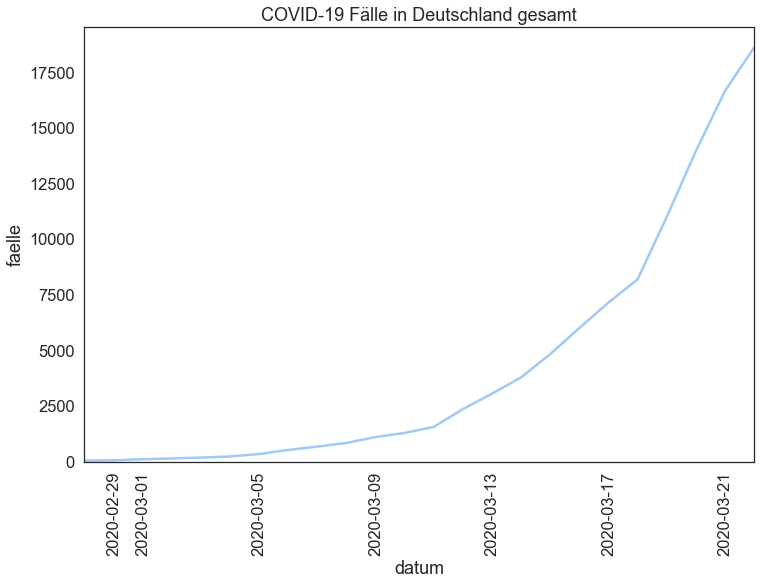

In [36]:
plt.figure(figsize=(12,8))
sns.lineplot(x="datum", y="faelle", data=df[df["bundesland"] == "Gesamt"], palette = sns.color_palette("husl", 16))
plt.title("COVID-19 Fälle in Deutschland gesamt")
plt.xlim(df["datum"].min(),df["datum"].max())
plt.ylim(bottom=0)
plt.xticks(rotation=90);


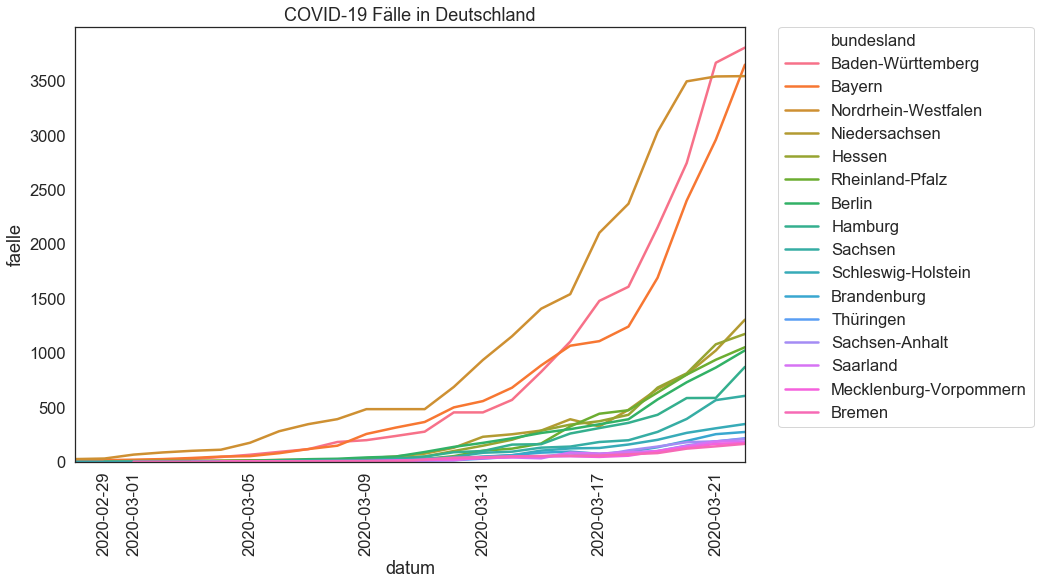

In [20]:
order = list(dfnew.sort_values("faelle", ascending = False).bundesland.unique())

plt.figure(figsize=(12,8))
sns.lineplot(x="datum", y="faelle", data=dfnew, hue="bundesland", palette = sns.color_palette("husl", 16), hue_order=order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True)
plt.title("COVID-19 Fälle in Deutschland")
plt.xlim(df["datum"].min(),df["datum"].max())
plt.ylim(bottom=0)
plt.xticks(rotation=90);

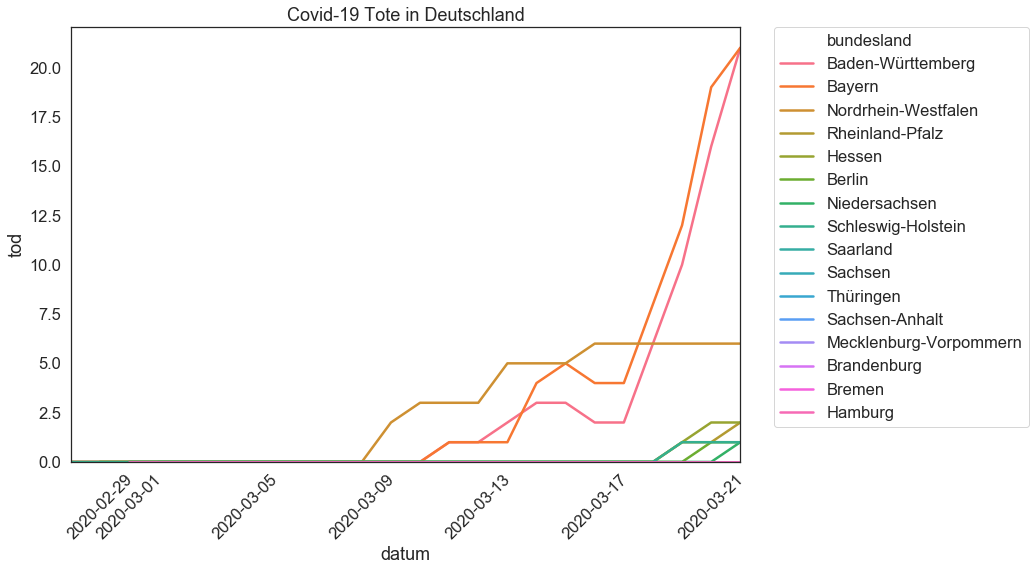

In [21]:
order = list(dfnew.sort_values("tod", ascending = False).bundesland.unique())

plt.figure(figsize=(12,8))
sns.lineplot(x="datum", y="tod", data=dfnew, hue="bundesland", palette = sns.color_palette("husl", 16), hue_order=order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True)
plt.title("Covid-19 Tote in Deutschland")
plt.xlim(df["datum"].min(),df["datum"].max())
plt.ylim(bottom=0)
plt.xticks(rotation=45);

In [22]:
dfnew_group = dfnew.groupby("bundesland")
dfnew2 = dfnew_group.max().reset_index()

In [23]:
dfnew2

bundesland  faelle  tod  neue_faelle  faelle_per_capita  \
0        Baden-Württemberg    3807   21          922               34.5   
1                   Bayern    3650   21          709               28.0   
2                   Berlin    1024    1          182               28.2   
3              Brandenburg     274    0           62               10.7   
4                   Bremen     165    0           41               24.2   
5                  Hamburg     872    0          285               47.5   
6                   Hessen    1175    2          267               18.8   
7   Mecklenburg-Vorpommern     172    0           42               10.7   
8            Niedersachsen    1306    1          283               16.4   
9      Nordrhein-Westfalen    3545    6          661               19.8   
10         Rheinland-Pfalz    1053    2          164               25.8   
11                Saarland     187    0           53               18.8   
12                 Sachsen     606    0          173               14.9   
13          Sachsen-Anhalt     211    0           47                9.5   
14      Schleswig-Holstein     347    1           64               12.0   
15               Thüringen     216    0           51               10.1   

      lat   long      datum  tod_per_capita      rate  neue_bundeslaender  
0   48.50   9.00 2020-03-22             0.2  0.551615                   0  
1   48.90  11.40 2020-03-22             0.2  0.641892                   0  
2   52.50  13.40 2020-03-22             0.0  0.115473                   0  
3   52.00  13.87 2020-03-22             0.0  0.000000                   1  
4   53.10   8.80 2020-03-22             0.0  0.000000                   0  
5   53.50  10.00 2020-03-22             0.0  0.000000                   0  
6   50.70   9.00 2020-03-22             0.0  0.185185                   0  
7   53.80  12.50 2020-03-22             0.0  0.000000                   1  
8   52.57  10.00 2020-03-22             0.0  0.076570                   0  
9   51.60   7.50 2020-03-22             0.0  0.619835                   0  
10  50.00   7.30 2020-03-22             0.0  0.189934                   0  
11  49.40   6.97 2020-03-22             0.0  0.000000                   0  
12  51.05  13.50 2020-03-22             0.0  0.000000                   1  
13  52.00  11.65 2020-03-22             0.0  0.000000                   1  
14  54.20   9.90 2020-03-22             0.0  0.375940                   0  
15  50.85  11.13 2020-03-22             0.0  0.000000                   1

In [24]:
fig = px.scatter_mapbox(dfnew2, lat="lat", lon="long", 
                        hover_name="bundesland", hover_data=["faelle", "tod"],
                        color_discrete_sequence=["blue"], zoom=4.8, 
                        center={"lat":51.1, "lon":10.3},
                        color_continuous_scale=px.colors.sequential.Jet,
                        height=500, color="tod", size="faelle", size_max=50)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
#fig.write_image("figures/map "+str(today)+".png")

In [27]:
dfnew3 = dfnew.copy()
dfnew3.datum = dfnew3.datum.astype("str")

In [29]:
fig = px.scatter_mapbox(dfnew3.sort_values("datum"), lat="lat", lon="long", 
                        hover_name="bundesland", hover_data=["faelle", "tod","neue_faelle","faelle_per_capita"],
                        color_discrete_sequence=["blue"], zoom=5,
                        animation_frame = "datum",
                        center={"lat":51.1, "lon":10.3},
                        range_color=[0,dfnew3.tod.max()],
                        color_continuous_scale=px.colors.sequential.Jet,
                        height=800, color="tod", size="faelle", size_max=80,
                        title="Corona Fälle in Deutschland")
fig.update_layout(mapbox_style="carto-positron")
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show(config={
    'scrollZoom': True,
    'displayModeBar': True,
    'editable': True
})

In [30]:
fig = px.scatter_mapbox(dfnew3.sort_values("datum"), lat="lat", lon="long", 
                        hover_name="bundesland", hover_data=["faelle", "tod","neue_faelle","faelle_per_capita"],
                        color_discrete_sequence=["blue"], zoom=5,
                        animation_frame = "datum",
                        center={"lat":51.1, "lon":10.3},
                        range_color=[0,dfnew3.tod.max()],
                        color_continuous_scale=px.colors.sequential.Jet,
                        height=800, color="tod", size="faelle_per_capita", size_max=40,
                        title="Corona Fälle pro 100.000 in Deutschland")
fig.update_layout(mapbox_style="carto-positron")
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show(config={
    'scrollZoom': True,
    'displayModeBar': True,
    'editable': True
})

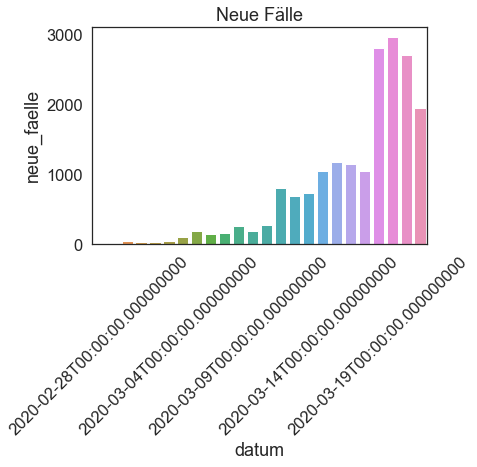

In [31]:
plot = sns.barplot(data = df[df["bundesland"]=="Gesamt"], x="datum", y="neue_faelle")
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.title("Neue Fälle")
plt.xticks(rotation=45);

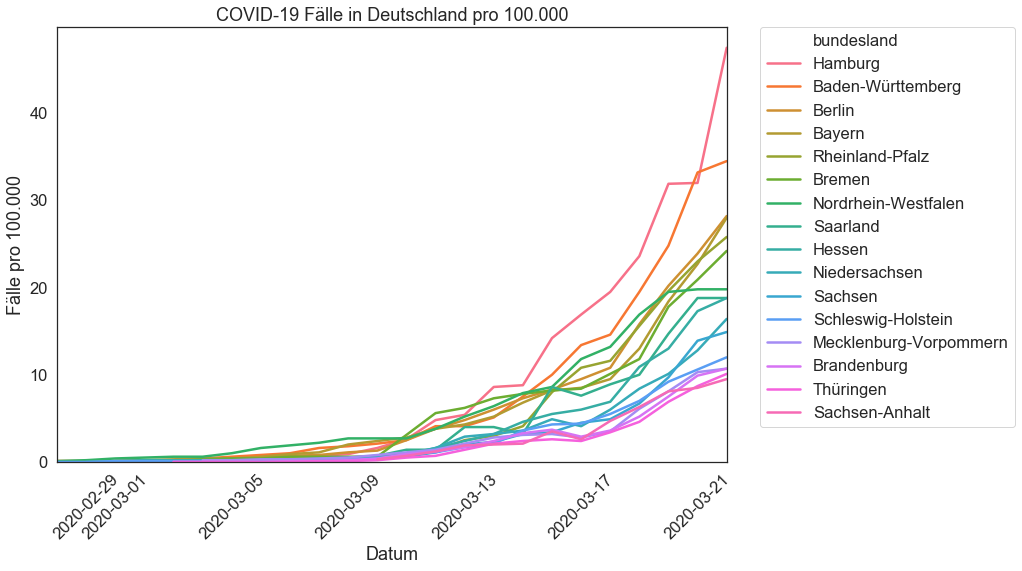

In [32]:
order = list(df[df["bundesland"] != "Gesamt"].sort_values("faelle_per_capita", ascending = False).bundesland.unique())

plt.figure(figsize=(12,8))
sns.lineplot(x="datum", y="faelle_per_capita", data=df[df["bundesland"] != "Gesamt"], 
             hue="bundesland", palette = sns.color_palette("husl", 16), hue_order=order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True)
plt.title("COVID-19 Fälle in Deutschland pro 100.000")
plt.ylabel("Fälle pro 100.000")
plt.xlabel("Datum")
plt.xlim(df["datum"].min(),df["datum"].max())
plt.ylim(bottom=0)
plt.xticks(rotation=45);

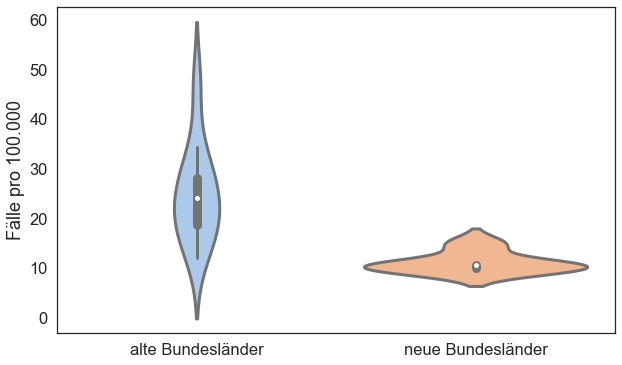

In [33]:
sns.set_style("white")
plt.figure (figsize=(10,6))
sns.violinplot(data = dfnew2 , y="faelle_per_capita", x="neue_bundeslaender",
              linewidth=3)
plt.ylabel("Fälle pro 100.000")
plt.xlabel("")
plt.xticks(np.arange(2),labels=("alte Bundesländer","neue Bundesländer"));

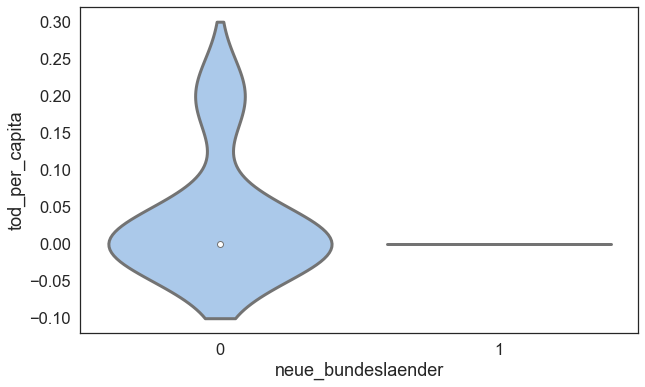

In [34]:
plt.figure (figsize=(10,6))
sns.violinplot(data = dfnew2 , y="tod_per_capita", x="neue_bundeslaender",
              linewidth=3)

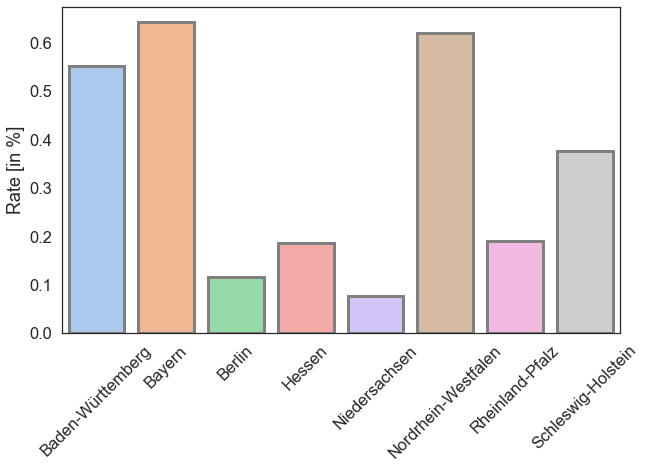

In [35]:
plt.figure (figsize=(10,6))
sns.barplot(data = dfnew2[dfnew2["rate"]!=0] , y="rate", x="bundesland",
            edgecolor="grey", linewidth=3)
plt.ylabel("Rate [in %]")
plt.xticks(rotation=45)
plt.xlabel("");